In [3]:
import pandas as pd


In [9]:
df= pd.read_csv('hotel_bookings_RAW.csv')

# Initial Screening

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)
print("DataFrame completo:")
print(df)

DataFrame completo:
               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2         

### Representación Gráfica de las Variables Categóricas

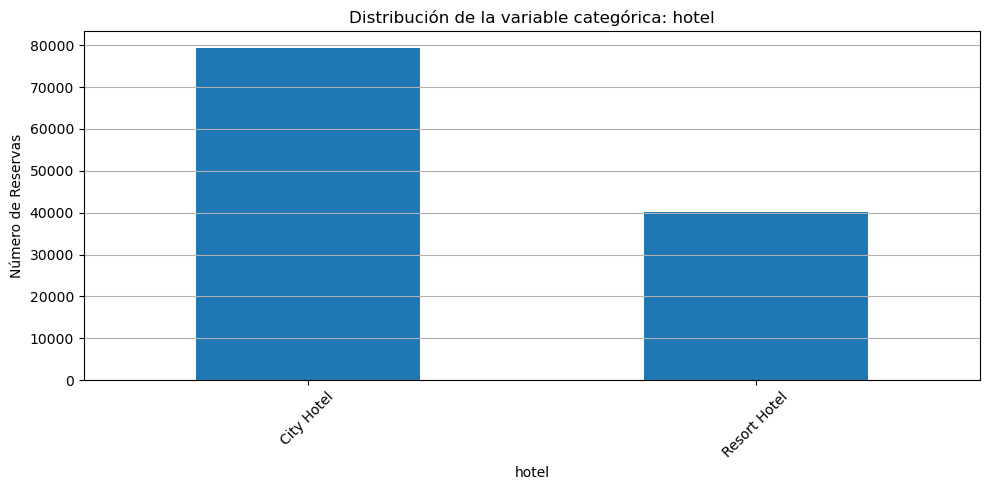

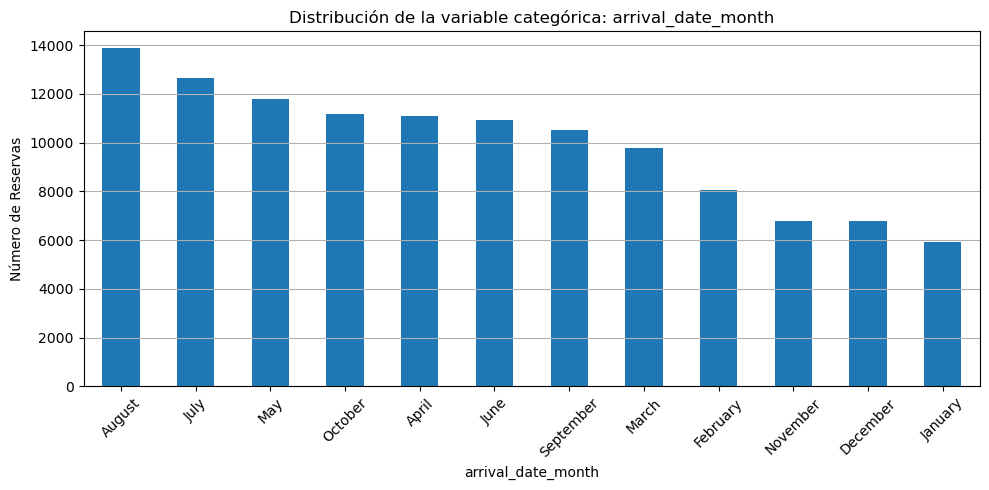

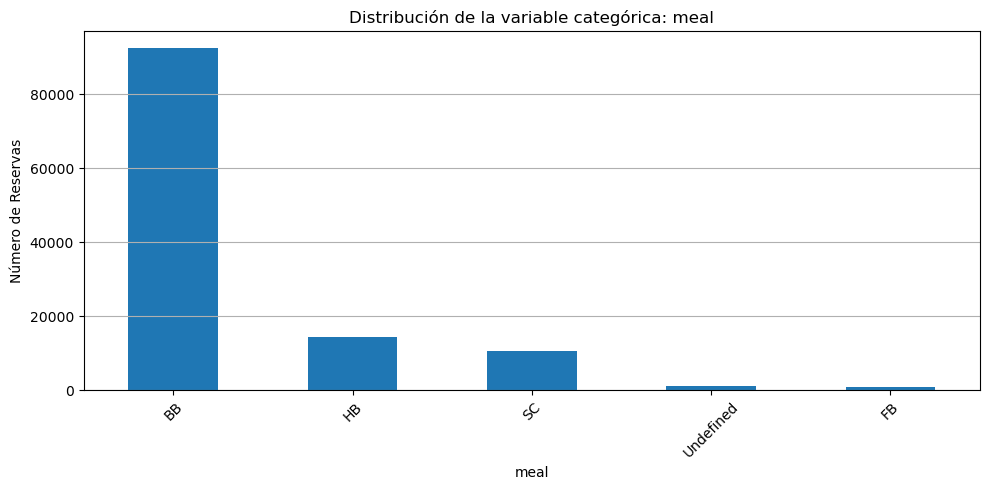

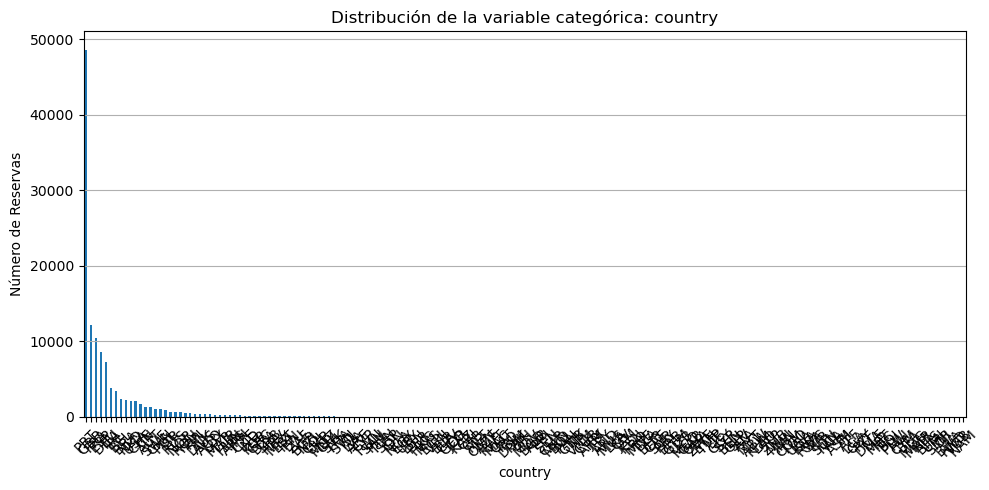

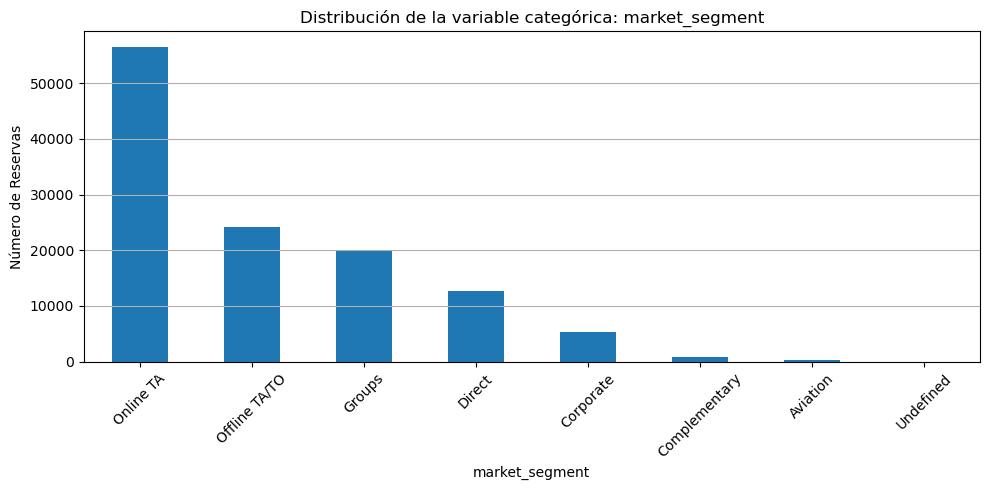

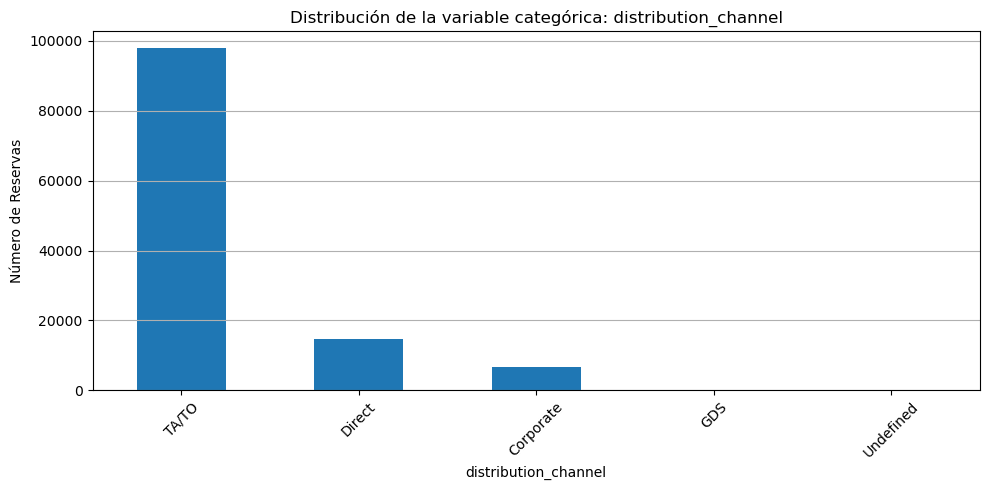

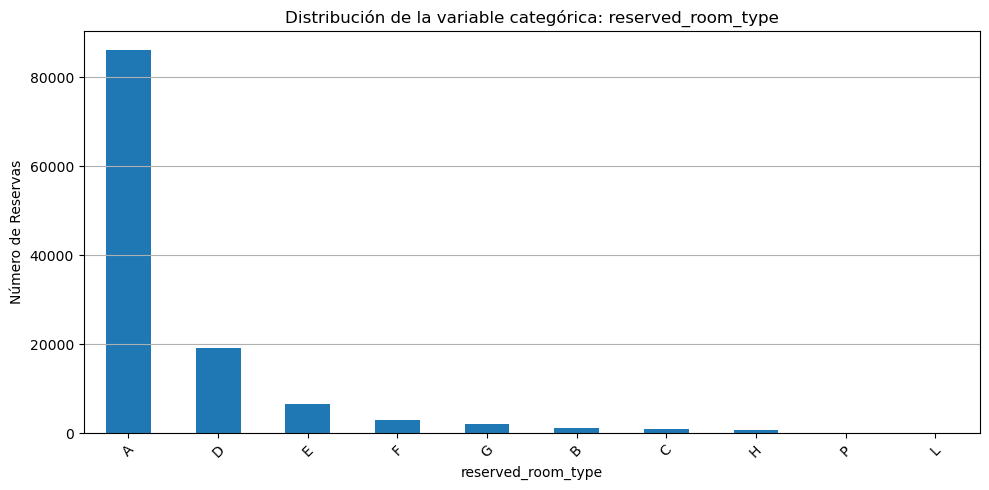

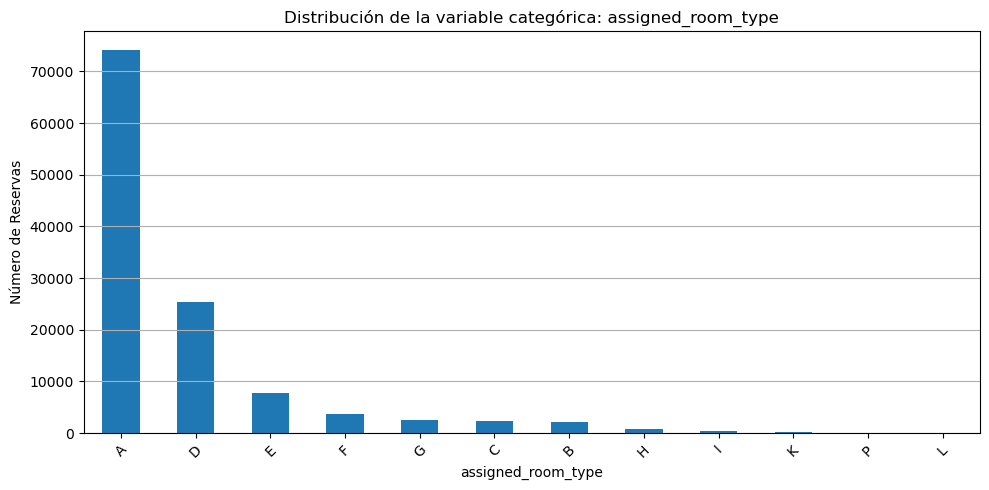

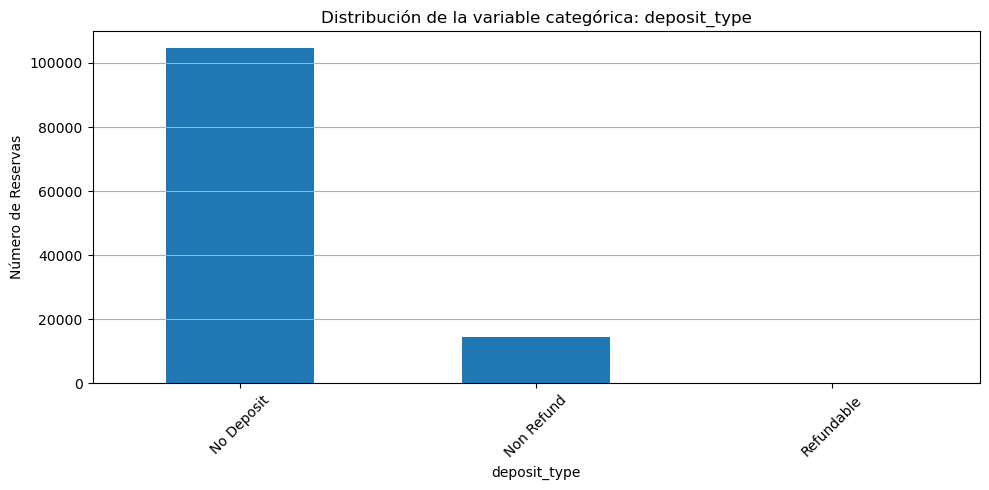

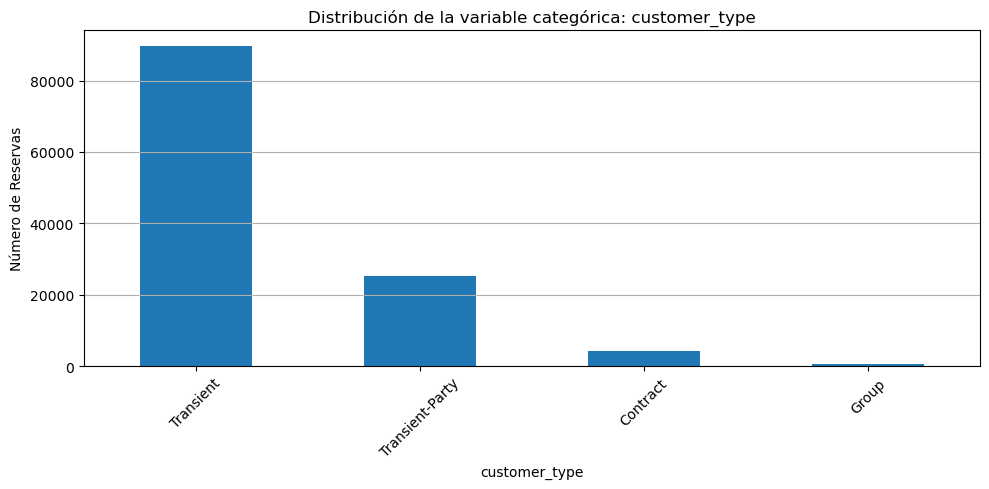

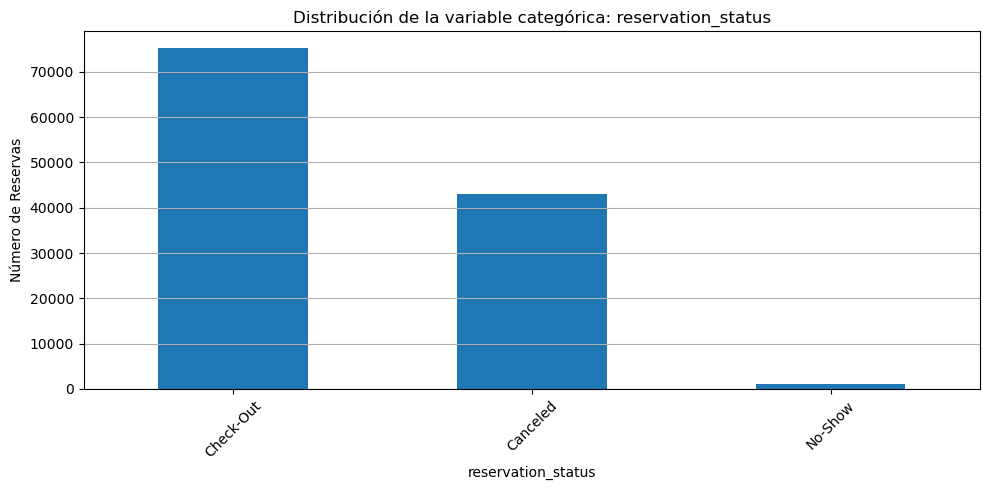

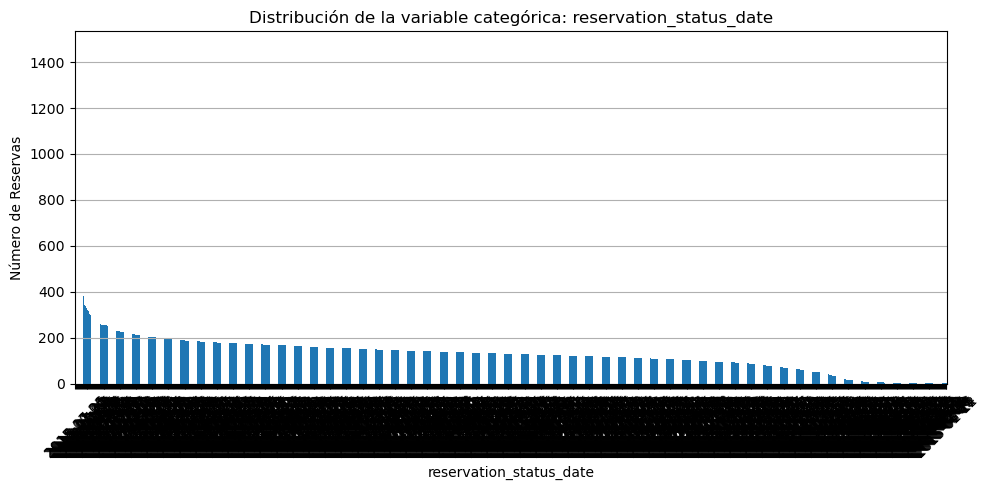

In [90]:
import matplotlib.pyplot as plt

# Identificar automáticamente columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Crear gráficos de barras para cada columna categórica
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Reservas')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
 

## Handle Missing Data

### Dropping Columns with Null- Values

Hay dos columnas, Agente y Compañía que tienen muchos valores nulos, por tanto vamos a analizar si éstas las conservamos o las mantenemos en función de la información que contienen:


In [37]:
print(df['agent'].head(10))
print("\nValores únicos en la columna 'agent':")
print(df['agent'].value_counts())

0      NaN
1      NaN
2      NaN
3    304.0
4    240.0
5    240.0
6      NaN
7    303.0
8    240.0
9     15.0
Name: agent, dtype: float64

Valores únicos en la columna 'agent':
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64


In [43]:
nulos_en_agentes = df['Agent'].isnull().sum()
print(f"Número de valores nulos en la columna 'agent': {nulos_en_agentes}")

Número de valores nulos en la columna 'agent': 16340


In [75]:
conteo = (df['distribution_channel'] == 'Direct').sum()
print(f"Número de valores Direct en la columna 'Distribution Channel': {conteo}")

Número de valores Direct en la columna 'Distribution Channel': 14645


In [150]:
print(df['company'].head(10))
print("\nValores únicos en la columna 'company':")
print(df['agent'].value_counts())

KeyError: 'company'

In [57]:
    nulos_en_agentes = df['agent'].isnull().sum()
    print(f"Número de valores nulos en la columna 'agent': {nulos_en_agentes}")

Número de valores nulos en la columna 'company': 112593


La Columna Agent tiene muchos valores nulos, pero en principio no eliminamos ya que nos puede dar los agentes con maypr porcentaje de cancelación

#### Eliminamos Columna 'Company'

In [125]:
df = df.drop('company', axis=1)

#### Eliminamos filas con valores nulos en la Columna 'Children'

In [120]:
print("Conteo de valores únicos en la columna 'children':")
conteo_valores = df['children'].value_counts(dropna=False)
print(conteo_valores)

Conteo de valores únicos en la columna 'children':
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: count, dtype: int64


In [139]:
# Eliminar filas donde 'children' sea nulo
df = df.dropna(subset=['children'])


#### Eliminamos filas con valores nulos en la Columna 'Country'

In [146]:
df = df.dropna(subset=['country'])

In [154]:
df.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 